In [7]:
import glob 
import os   
import pandas as pd
import re 
import numpy as np
import datetime as dt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
os.chdir('C:/Users/ws/demoproject1')

In [69]:
filenames = glob.glob('*_sales_2015_2018.xlsx')
filenames

['anti-moth_tablets_sales_2015_2018.xlsx',
 'electric_mosquito_coil_set_sales_2015_2018.xlsx',
 'mosquito_coils_sales_2015_2018.xlsx',
 'mosquito_coil_heater_sales_2015_2018.xlsx',
 'mosquito_repellent_incense_tray_sales_2015_2018.xlsx',
 'mosquito_repellent_sales_2015_2018.xlsx',
 'rodenticide_sales_2015_2018.xlsx']

In [70]:
re.search(r'.*(?=_sales)',"electric_mosquito_coil_set_sales_2015_2018.xlsx",).group()

'electric_mosquito_coil_set'

In [71]:
def load_xlsx(filename):
    #Extract subcategory names
    colname = re.search(r'.*(?=_sales)',filename).group()
    #read file
    df = pd.read_excel(filename)
    #modify the date format
    if df['year'].dtypes == 'int64':
        df['year'] = pd.to_datetime(df['year'],unit='D',origin=pd.Timestamp('1899-12-30'))
    
    #Rename column to subcategory name
    df.rename(columns={df.columns[1]:colname},inplace=True)
    
    #Set time column as index
    df = df.set_index('year')
    return df

In [72]:
dfs = [load_xlsx(i) for i in filenames]

In [73]:
df = pd.concat(dfs,axis=1).reset_index()
df.head()

,year,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
0,2018-10-01,8541153.59,106531.29,1032414.29,315639.48,4171283.35,7814546.15,1.136548e+08
1,2018-09-01,8825870.43,105666.63,1566651.88,457366.41,6784500.17,10654973.47,1.440261e+08
2,2018-08-01,6320153.44,201467.03,2617149.00,746513.13,10709683.41,17835577.80,1.540426e+08
3,2018-07-01,6302595.06,438635.29,6209040.06,1871757.00,16589184.89,38877917.83,1.480032e+08
4,2018-06-01,7047206.98,953749.78,12484919.63,3641025.92,23526385.73,76499091.86,1.359438e+08


## Complete the 2018 Nov and Dec data
Extract the month for modeling index

In [74]:
month = df['year'].dt.month
month

0     10
1      9
2      8
3      7
4      6
5      5
6      4
7      3
8      2
9      1
10    12
11    11
12    10
13     9
14     8
15     7
16     6
17     5
18     4
19     3
20     2
21     1
22    12
23    11
24    10
25     9
26     8
27     7
28     6
29     5
30     4
31     3
32     2
33     1
34    12
35    11
Name: year, dtype: int64

- forecast the sales for November and December 2018

In [75]:
for i in [11,12]:
    # Extract data for the month
    dm = df[month == i]   #2015.11  2016.11  2017.11 
    # train x is the year
    xtrain = np.array(dm['year'].dt.year).reshape(-1,1)
    # Test y is the new row, the corresponding date
    ytest = [pd.datetime(2018,i,1)]
    for j in range(1,len(dm.columns)):
        # ytrain is the specified column
        ytrain = np.array(dm.iloc[:,j]).reshape(-1,1)
        # regression modeling
        lm = LinearRegression().fit(xtrain,ytrain)
        # Predict sales when test is 2018
        yhat = lm.predict(np.array([2018]).reshape(-1,1))
        ytest.append(round(yhat[0][0],2))
    # Assign the corresponding column name to the prediction result
    newrow = pd.DataFrame([dict(zip(df.columns,ytest))])
    # Append the prediction result to the data
    df = newrow.append(df)

C:\Users\ws\AppData\Local\Temp\ipykernel_8284\3814628426.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ytest = [pd.datetime(2018,i,1)]
C:\Users\ws\AppData\Local\Temp\ipykernel_8284\3814628426.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = newrow.append(df)
C:\Users\ws\AppData\Local\Temp\ipykernel_8284\3814628426.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dm = df[month == i]   #2015.11  2016.11  2017.11
C:\Users\ws\AppData\Local\Temp\ipykernel_8284\3814628426.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ytest = [pd.datetime(2018,i,1)]
C:\Users\ws\AppData\Local\Temp\ipykernel_8284\3814628426.py:19: FutureWarning: The frame.append method i

In [76]:
df

,year,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
0,2018-12-01,3958717.58,50204.53,426812.59,86849.17,928554.26,3.081492e+06,5.256763e+07
0,2018-11-01,6678677.55,38692.61,776627.04,193874.39,1801318.82,5.543204e+06,7.175250e+07
0,2018-10-01,8541153.59,106531.29,1032414.29,315639.48,4171283.35,7.814546e+06,1.136548e+08
1,2018-09-01,8825870.43,105666.63,1566651.88,457366.41,6784500.17,1.065497e+07,1.440261e+08
2,2018-08-01,6320153.44,201467.03,2617149.00,746513.13,10709683.41,1.783558e+07,1.540426e+08
3,2018-07-01,6302595.06,438635.29,6209040.06,1871757.00,16589184.89,3.887792e+07,1.480032e+08
4,2018-06-01,7047206.98,953749.78,12484919.63,3641025.92,23526385.73,7.649909e+07,1.359438e+08
5,2018-05-01,7942340.44,1238967.37,15309721.94,5032466.78,28118581.25,1.050396e+08,1.241642e+08
6,2018-04-01,7031364.60,841051.93,7954875.07,3130513.43,16420341.87,6.254165e+07,7.509661e+07
7,2018-03-01,6051561.02,475177.48,2950648.32,1198332.81,7900094.91,2.632447e+07,5.918182e+07


In [77]:
# remove the original index
df.reset_index(drop=True,inplace=True)

In [79]:
# Remove year 2015 data
df = df[df['year'].dt.year != 2015]

In [80]:
df

,year,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
0,2018-12-01,3958717.58,50204.53,426812.59,86849.17,928554.26,3.081492e+06,5.256763e+07
1,2018-11-01,6678677.55,38692.61,776627.04,193874.39,1801318.82,5.543204e+06,7.175250e+07
2,2018-10-01,8541153.59,106531.29,1032414.29,315639.48,4171283.35,7.814546e+06,1.136548e+08
3,2018-09-01,8825870.43,105666.63,1566651.88,457366.41,6784500.17,1.065497e+07,1.440261e+08
4,2018-08-01,6320153.44,201467.03,2617149.00,746513.13,10709683.41,1.783558e+07,1.540426e+08
5,2018-07-01,6302595.06,438635.29,6209040.06,1871757.00,16589184.89,3.887792e+07,1.480032e+08
6,2018-06-01,7047206.98,953749.78,12484919.63,3641025.92,23526385.73,7.649909e+07,1.359438e+08
7,2018-05-01,7942340.44,1238967.37,15309721.94,5032466.78,28118581.25,1.050396e+08,1.241642e+08
8,2018-04-01,7031364.60,841051.93,7954875.07,3130513.43,16420341.87,6.254165e+07,7.509661e+07
9,2018-03-01,6051561.02,475177.48,2950648.32,1198332.81,7900094.91,2.632447e+07,5.918182e+07


## Market analysis
1. Analyze general trends across the market
2. Analyze the trend of each sub-categories
3. Analyze sub-categories concentration

In [81]:
# Create total transaction amount column
df['colsums'] = df.sum(1)

C:\Users\ws\AppData\Local\Temp\ipykernel_8284\2649067004.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['colsums'] = df.sum(1)
C:\Users\ws\AppData\Local\Temp\ipykernel_8284\2649067004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colsums'] = df.sum(1)


In [82]:
df

,year,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide,colsums
0,2018-12-01,3958717.58,50204.53,426812.59,86849.17,928554.26,3.081492e+06,5.256763e+07,6.110026e+07
1,2018-11-01,6678677.55,38692.61,776627.04,193874.39,1801318.82,5.543204e+06,7.175250e+07,8.678489e+07
2,2018-10-01,8541153.59,106531.29,1032414.29,315639.48,4171283.35,7.814546e+06,1.136548e+08,1.356363e+08
3,2018-09-01,8825870.43,105666.63,1566651.88,457366.41,6784500.17,1.065497e+07,1.440261e+08,1.724211e+08
4,2018-08-01,6320153.44,201467.03,2617149.00,746513.13,10709683.41,1.783558e+07,1.540426e+08,1.924731e+08
5,2018-07-01,6302595.06,438635.29,6209040.06,1871757.00,16589184.89,3.887792e+07,1.480032e+08,2.182924e+08
6,2018-06-01,7047206.98,953749.78,12484919.63,3641025.92,23526385.73,7.649909e+07,1.359438e+08,2.600962e+08
7,2018-05-01,7942340.44,1238967.37,15309721.94,5032466.78,28118581.25,1.050396e+08,1.241642e+08,2.868459e+08
8,2018-04-01,7031364.60,841051.93,7954875.07,3130513.43,16420341.87,6.254165e+07,7.509661e+07,1.730164e+08
9,2018-03-01,6051561.02,475177.48,2950648.32,1198332.81,7900094.91,2.632447e+07,5.918182e+07,1.040821e+08


In [83]:
df.insert(1,'year_only',df['year'].dt.year) #create year only column

In [85]:
gpyear = df.groupby('year_only').sum().reset_index()
gpyear

,year_only,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide,colsums
0,2016,50023001.94,7666572.12,27980839.47,5905204.71,4.785285e+07,1.704905e+08,6.080471e+08,9.179661e+08
1,2017,62678822.18,9377531.68,49068587.96,10552841.02,8.635539e+07,3.300656e+08,8.477740e+08,1.395873e+09
2,2018,72701365.23,4537682.09,51845921.56,16836723.43,1.180885e+08,3.582077e+08,1.137893e+09,1.760111e+09


1. Bayer Pesticide Market Trend

C:\Users\ws\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


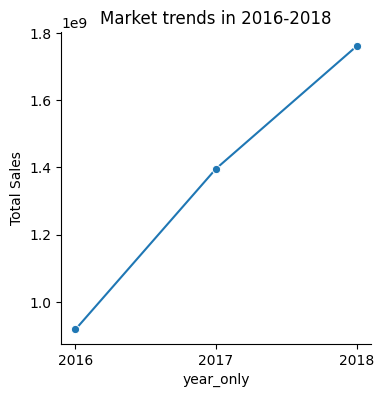

In [91]:
sns.relplot('year_only','colsums',kind='line',marker='o',data=gpyear,height=4)
plt.title('Pesticide Market Trend in 2016-2018')
plt.xticks(gpyear.year_only)
plt.xlabel('year_only')
plt.ylabel('Total Sales')
plt.show()

2. Analyze various sub-categories sales trends

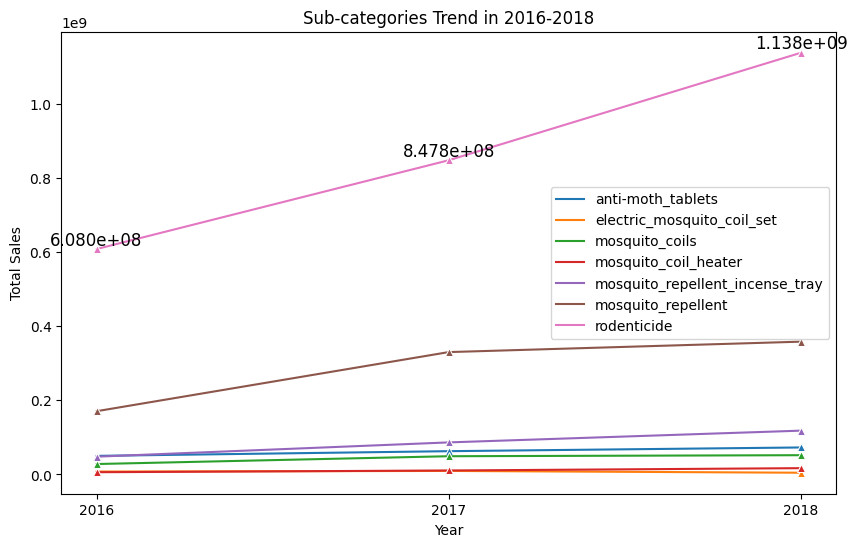

In [105]:

f,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=gpyear.set_index('year_only').iloc[:,:-1],dashes=False,marker='^')
plt.title('Pesticide Sub-categories Trend in 2016-2018')
plt.xticks(gpyear.year_only)
# add text at the specified location
for a,b in zip(gpyear.year_only,gpyear['rodenticide']):
    plt.text(a,b,'%.3e'% b, ha='center',va='bottom',size=12)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

- The growth trend of rodenticide in the year 2016-2018

C:\Users\ws\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ws\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


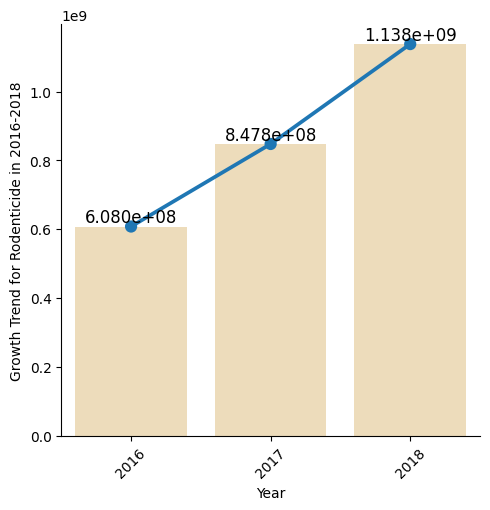

In [106]:
g = sns.FacetGrid(gpyear,height=5)
g.map(sns.barplot,'year_only','rodenticide',color='wheat')
g.map(sns.pointplot,'year_only','rodenticide')

for a,b in zip(range(len(gpyear)),gpyear['rodenticide']):
    plt.text(a,b,'%.3e'% b, ha='center',va='bottom',size=12)

plt.xlabel('Year')
plt.ylabel('Growth Trend for Rodenticide in 2016-2018')
plt.xticks(rotation=45)
plt.show()

In [107]:
# Calculate the proportion of each categories each year
gpyear_per = gpyear.iloc[:,1:-1].div(gpyear.colsums,axis=0)
gpyear_per.index = gpyear.year_only
gpyear_per

,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
year_only,,,,,,,
2016,0.054493,0.008352,0.030481,0.006433,0.052129,0.185726,0.662385
2017,0.044903,0.006718,0.035153,0.007560,0.061865,0.236458,0.607343
2018,0.041305,0.002578,0.029456,0.009566,0.067092,0.203514,0.646489


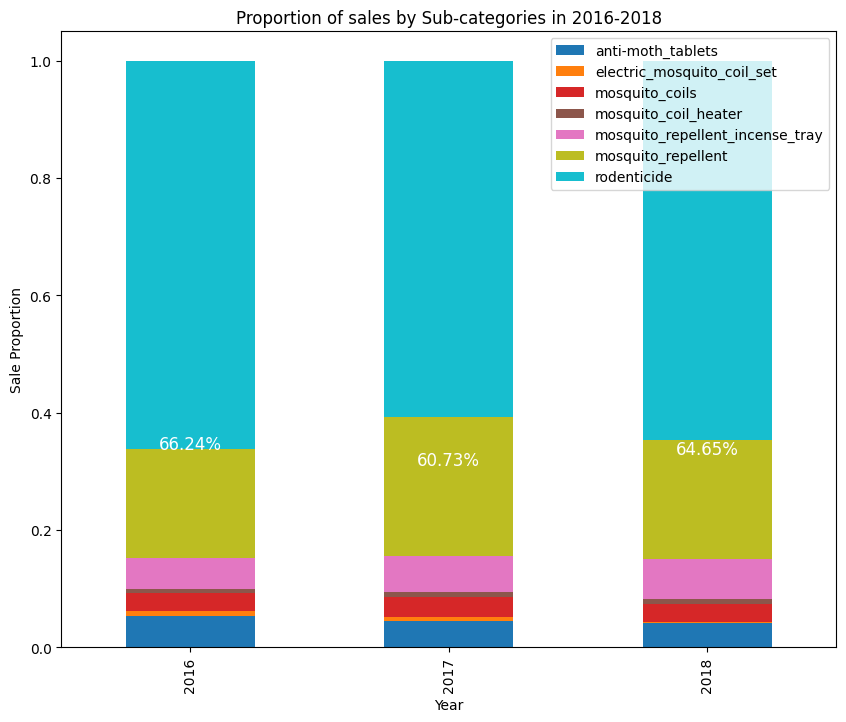

In [108]:
gpyear_per.plot(kind='bar',stacked=True,figsize=(10,8),colormap='tab10')

for a,b in zip(range(len(gpyear_per)),gpyear_per['rodenticide']):
    plt.text(a,b/2,f'{b*100:.2f}%', ha='center',va='bottom',size=12,color='white')


plt.xlabel('Year')
plt.ylabel('Sale Proportion')
plt.title('Proportion of Pesticide Sales by Sub-categories in 2016-2018')
plt.show()

- View annual growth across sub-categories

In [109]:
# Get the middle 7 columns
gpyear1 = gpyear.iloc[:,1:-1] 
# 2017-2016  2018-2017 
gpyear1.diff()  

,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12655820.24,1710959.56,21087748.49,4647636.31,38502539.41,1.595750e+08,2.397269e+08
2,10022543.05,-4839849.59,2777333.60,6283882.41,31733116.21,2.814215e+07,2.901194e+08


In [114]:
gpyear1

,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
0,50023001.94,7666572.12,27980839.47,5905204.71,4.785285e+07,1.704905e+08,6.080471e+08
1,62678822.18,9377531.68,49068587.96,10552841.02,8.635539e+07,3.300656e+08,8.477740e+08
2,72701365.23,4537682.09,51845921.56,16836723.43,1.180885e+08,3.582077e+08,1.137893e+09


In [115]:
# Calculate the annual increase
gpyear1 = gpyear.iloc[:,1:-1] 
gpyear_diff = gpyear1.diff().iloc[1:,:].reset_index(drop=True)/gpyear1.iloc[:2,:]
gpyear_diff.index = ['2016-2017','2017-2018']
gpyear_diff

,anti-moth_tablets,electric_mosquito_coil_set,mosquito_coils,mosquito_coil_heater,mosquito_repellent_incense_tray,mosquito_repellent,rodenticide
2016-2017,0.253000,0.223171,0.753650,0.787041,0.804603,0.935976,0.394257
2017-2018,0.159903,-0.516111,0.056601,0.595468,0.367471,0.085262,0.342213


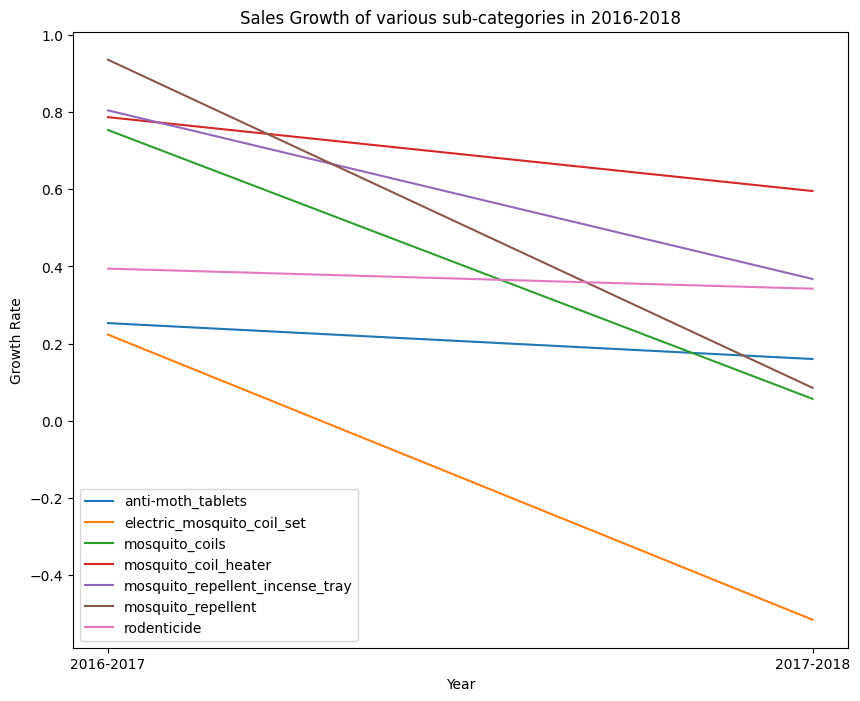

In [117]:
f,ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=gpyear_diff,dashes=False)
plt.title('Sales Growth of various sub-categories in 2016-2018')

plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()

## Analysis of market opportunities for rodenticides
Product Category Distribution

In [95]:
df = pd.read_csv('Pesticide Market Segment.csv',index_col=0)

In [96]:
df.head()

,category,product_id,order_number,price,sales,number_rating,number_favorites
0,Insecticide,578459866289,99,29.9,2960.1,26.0,202
1,Insecticide,548196868239,99,0.6,59.4,1330.0,242
2,Insecticide,580839295562,99,98.0,9702.0,44.0,27
3,Insecticide,580264662322,99,6.9,683.1,24.0,26
4,Insecticide,44484517973,99,18.8,1861.2,121.0,133


In [97]:
df.dtypes

category             object
product_id            int64
order_number          int64
price               float64
sales               float64
number_rating       float64
number_favorites      int64
dtype: object

In [99]:
df = df.astype({'product_id':'object'}) #convert product_id to object
df.reset_index(drop=True,inplace=True)

In [100]:
bycategory = df['sales'].groupby(df['category']).sum()
bycategory

category
Cockroach      18037223.68
Insecticide     8207628.10
Lice            4512886.01
Mite           10886752.88
Rodent         25686011.99
Name: sales, dtype: float64

<AxesSubplot:ylabel='category'>

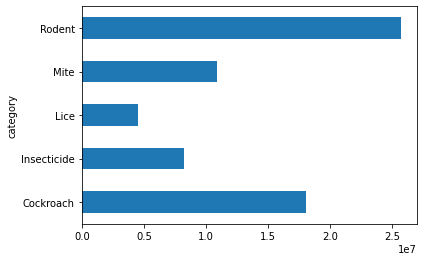

In [101]:
bycategory.plot.barh()

<AxesSubplot:ylabel='sales'>

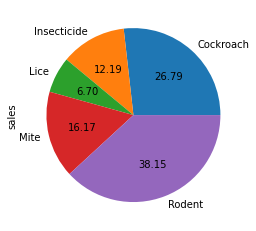

In [102]:
bycategory.plot.pie(autopct='%.2f')

In [103]:
import plotly.graph_objects as go 

fig = go.Figure(data=[go.Pie(labels=bycategory.index,values=bycategory.values)])
fig.show()

## Rodent Category Analysis

In [104]:
df2 = df[df['category']== 'Rodent']
df2

,category,product_id,order_number,price,sales,number_rating,number_favorites
2000,Rodent,566054780243,9976,26.80,267356.8,11901.0,11596
2001,Rodent,566054780243,9976,26.80,267356.8,NaN,11596
2002,Rodent,572115448996,9945,9.90,98455.5,26442.0,3569
2003,Rodent,39868408322,99,29.90,2960.1,20.0,352
2004,Rodent,520282897220,99,39.90,3950.1,559.0,1250
...,...,...,...,...,...,...,...
3518,Rodent,573118678210,0,22.00,NaN,3.0,0
3519,Rodent,550586926422,0,38.00,NaN,0.0,1
3520,Rodent,520862079013,0,64.00,NaN,0.0,2
3521,Rodent,550586926422,0,38.00,NaN,0.0,1


In [105]:
df2.dtypes

category             object
product_id           object
order_number          int64
price               float64
sales               float64
number_rating       float64
number_favorites      int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

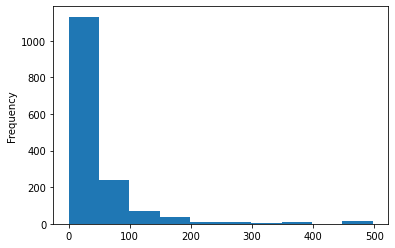

In [106]:
df2['price'].plot.hist()

## 0-500 Price Range Sales Analysis

In [107]:
# Create custom bin for sales; convert continuous variables to range variables
bins = [0,50,100,150,200,250,300,500] 
labels = ['0_50','50_100','100_150','150_200','200_250','250_300','300_500'] # bins name
df2['price_range'] = pd.cut(df2['price'],bins,labels=labels,include_lowest=True)
df2['price_range'].value_counts()

C:\Users\ws\AppData\Local\Temp\ipykernel_12780\1190777114.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0_50       1138
50_100      242
100_150      62
150_200      35
300_500      28
200_250       9
250_300       9
Name: price_range, dtype: int64

In [108]:
df2

,category,product_id,order_number,price,sales,number_rating,number_favorites,price_range
2000,Rodent,566054780243,9976,26.80,267356.8,11901.0,11596,0_50
2001,Rodent,566054780243,9976,26.80,267356.8,NaN,11596,0_50
2002,Rodent,572115448996,9945,9.90,98455.5,26442.0,3569,0_50
2003,Rodent,39868408322,99,29.90,2960.1,20.0,352,0_50
2004,Rodent,520282897220,99,39.90,3950.1,559.0,1250,0_50
...,...,...,...,...,...,...,...,...
3518,Rodent,573118678210,0,22.00,NaN,3.0,0,0_50
3519,Rodent,550586926422,0,38.00,NaN,0.0,1,0_50
3520,Rodent,520862079013,0,64.00,NaN,0.0,2,50_100
3521,Rodent,550586926422,0,38.00,NaN,0.0,1,0_50


- Calculate the sales, sales ratio, product number, and product number ratio of each price range

In [109]:
df2.groupby('price_range').sum()

,order_number,price,sales,number_rating,number_favorites
price_range,,,,,
0_50,765446,24633.00,15162086.51,840615.0,1150300
50_100,46419,18895.85,3335060.19,362521.0,461409
100_150,20769,7838.95,2758086.29,48608.0,102286
150_200,3525,6440.00,629813.00,8413.0,19591
200_250,12556,2074.00,2743758.00,707.0,43652
250_300,808,2546.00,237740.00,682.0,7366
300_500,1683,12228.00,819468.00,5795.0,46655


In [110]:
# Extact out the sales column
df3 = pd.DataFrame(df2.groupby('price_range').sum().loc[:,['sales']])
df3

,sales
price_range,
0_50,15162086.51
50_100,3335060.19
100_150,2758086.29
150_200,629813.00
200_250,2743758.00
250_300,237740.00
300_500,819468.00


In [111]:
#Sales ratio, number of product, ratio of product, average sales of a single product
df3['sales_proportion'] = df3['sales'] / df3['sales'].sum()
df3['number_of_product'] = df2.groupby('price_range').nunique()['product_id']
df3['product_proportion'] = df3['number_of_product'] / df3['number_of_product'].sum()
df3['average_sales_each_product'] =  df3['sales']/df3['number_of_product']

In [112]:
df3

,sales,sales_proportion,number_of_product,product_proportion,average_sales_each_product
price_range,,,,,
0_50,15162086.51,0.590286,854,0.753086,17754.199660
50_100,3335060.19,0.129840,172,0.151675,19389.884826
100_150,2758086.29,0.107377,46,0.040564,59958.397609
150_200,629813.00,0.024520,28,0.024691,22493.321429
200_250,2743758.00,0.106819,7,0.006173,391965.428571
250_300,237740.00,0.009256,9,0.007937,26415.555556
300_500,819468.00,0.031903,18,0.015873,45526.000000


- Competitiveness (the opposite of the average_sales_each_product)
- The higher the average sales of a product, the lower the competition; the lower, the greater the competition

In [113]:
df3['relative_competitiveness'] = 1- (df3['average_sales_each_product']-df3['average_sales_each_product'].min())/(
                        df3['average_sales_each_product'].max()-df3['average_sales_each_product'].min())

In [114]:
df3

,sales,sales_proportion,number_of_product,product_proportion,average_sales_each_product,relative_competitiveness
price_range,,,,,,
0_50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000
50_100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
100_150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
150_200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
200_250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
250_300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
300_500,819468.00,0.031903,18,0.015873,45526.000000,0.925786


In [115]:
# function
def bypro(df,by,sort='average_sales_each_product'):
    pro = pd.DataFrame(df.groupby(by).sum().loc[:,['sales']])
    ## Sales ratio, number of product, ratio of product, average sales of a product
    pro['sales_proportion'] = pro['sales'] / pro['sales'].sum()
    pro['number_of_product'] = df.groupby(by).nunique()['product_id']
    pro['product_proportion'] = pro['number_of_product'] / pro['number_of_product'].sum()
    pro['average_sales_each_product'] =  pro['sales']/pro['number_of_product']
    pro['relative_competitiveness'] = 1- (pro['average_sales_each_product']-pro['average_sales_each_product'].min())/(
                        pro['average_sales_each_product'].max()-pro['average_sales_each_product'].min())
    if sort:
        pro.sort_values(sort,ascending=False,inplace=True)
    return pro

In [116]:
byprices = bypro(df2,'price_range')
byprices

,sales,sales_proportion,number_of_product,product_proportion,average_sales_each_product,relative_competitiveness
price_range,,,,,,
200_250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
100_150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
300_500,819468.00,0.031903,18,0.015873,45526.000000,0.925786
250_300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
150_200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
50_100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
0_50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000


In [117]:
def mcplot(bydf,figsize=(10,4)):
    ax = bydf.plot(y='relative_competitiveness',linestyle='-',marker='o',figsize=figsize)
    bydf.plot(y='sales_proportion',kind='bar',alpha=0.8,color='wheat',ax=ax)
    plt.show()
    

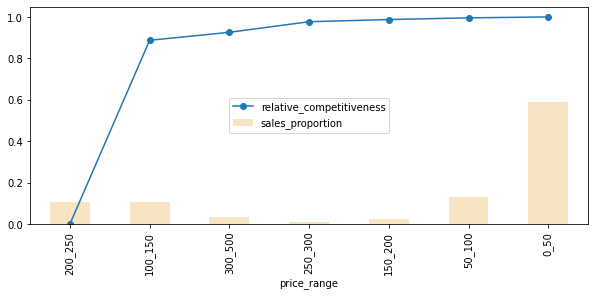

In [118]:
mcplot(byprices)

## 0-50 Price Range Sales Analysis

In [120]:
df4 = df2[df2['price_range']=='0_50']

<AxesSubplot:ylabel='Frequency'>

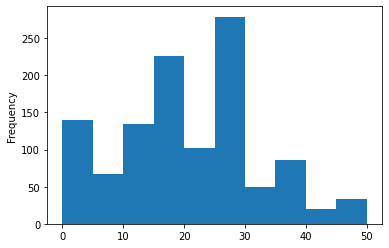

In [121]:
df4['price'].plot.hist()

In [123]:
# Create custom bin for sales; convert continuous variables to range variables
bins_01 = [0,10,20,30,40,50] #分界线
labels_01 = ['0_10','10_20','20_30','30_40','40_25'] # bins name
df4['price_range_sub'] = pd.cut(df4['price'],bins_01,labels=labels_01,include_lowest=True)

C:\Users\ws\AppData\Local\Temp\ipykernel_12780\2306084012.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
df4

,category,product_id,order_number,price,sales,number_rating,number_favorites,price_range
2000,Rodent,566054780243,9976,26.80,267356.8,11901.0,11596,20_30
2001,Rodent,566054780243,9976,26.80,267356.8,NaN,11596,20_30
2002,Rodent,572115448996,9945,9.90,98455.5,26442.0,3569,0_10
2003,Rodent,39868408322,99,29.90,2960.1,20.0,352,20_30
2004,Rodent,520282897220,99,39.90,3950.1,559.0,1250,30_40
...,...,...,...,...,...,...,...,...
3511,Rodent,573793765449,0,17.16,NaN,6.0,0,10_20
3514,Rodent,36825350895,0,0.60,NaN,10.0,63,0_10
3518,Rodent,573118678210,0,22.00,NaN,3.0,0,20_30
3519,Rodent,550586926422,0,38.00,NaN,0.0,1,30_40


In [124]:
byprices_01 = bypro(df4,'price_range_sub')
byprices_01

,sales,sales_proportion,number_of_product,product_proportion,average_sales_each_product,relative_competitiveness
price_range,,,,,,
10_20,8102634.14,0.534401,272,0.318501,29789.096103,0.000000
20_30,4969620.92,0.327766,278,0.325527,17876.334245,0.411674
40_25,707568.49,0.046667,40,0.046838,17689.212250,0.418141
30_40,1240874.19,0.081841,98,0.114754,12661.981531,0.591869
0_10,141388.77,0.009325,166,0.194379,851.739578,1.000000


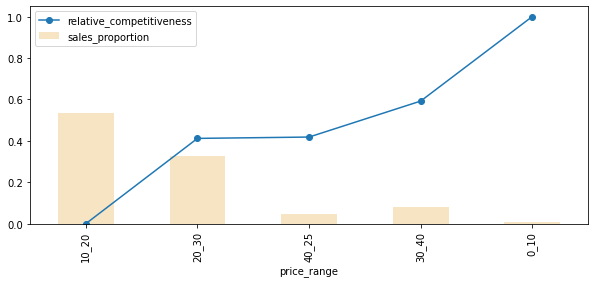

In [125]:
mcplot(byprices_01)